In [ ]:
!pip install tensorflow-federated==0.20.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 819 kB 15.6 MB/s 
     |████████████████████████████████| 65.1 MB 86 kB/s 
     |████████████████████████████████| 121 kB 54.1 MB/s 
     |████████████████████████████████| 4.0 MB 43.8 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 887 kB 47.3 MB/s 
     |████████████████████████████████| 251 kB 41.3 MB/s 
     |████████████████████████████████| 237 kB 36.8 MB/s 
     |████████████████████████████████| 4.2 MB 16.6 MB/s 
  Created wheel for jax: filename=jax-0.2.28-py3-none-any.whl size=1028669 sha256=99dde2e5b14af0f7f993acbcba8b0e659bfc6b2913a9e010fef423b89dfc09f5
  Stored in directory: /root/.cache/pip/wheels/e2/60/4c/0cf931b766116b73950d9b6fca5813a45789d45d412a8d7272
Successfully built jax
  Attempting uninstall: cachetools
    Found exis

In [ ]:
import collections

In [ ]:

import pandas as pd
import tensorflow as tf

import numpy as np

In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 668.3 MB 55.6 MB/s
     |████████████████████████████████| 462 kB 14.6 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
import tensorflow_federated as tff

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
thyroid_data=pd.read_csv('/content/gdrive/MyDrive/hypothyroid.csv')

In [ ]:
thyroid_data=thyroid_data.drop(labels='client_id', axis = 1)

In [ ]:
thyroid_data = thyroid_data.replace({'?':np.NAN})

In [ ]:
thyroid_data.head

<bound method NDFrame.head of      age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     41   F            f                  f                         f    f   
1     23   F            f                  f                         f    f   
2     46   M            f                  f                         f    f   
3     70   F            t                  f                         f    f   
4     70   F            f                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
3767  30   F            f                  f                         f    f   
3768  68   F            f                  f                         f    f   
3769  74   F            f                  f                         f    f   
3770  72   M            f                  f                         f    f   
3771  64   F            f                  f                         f    f   

     pregnant thyroid

In [ ]:
thyroid_data = thyroid_data.drop(labels='TBG', axis = 1)

In [ ]:
thyroid_data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [ ]:
thyroid_data = thyroid_data.replace({"P":0,"N":1})

In [ ]:
thyroid_data = thyroid_data.replace({"f":0,"t":1})

In [ ]:
thyroid_data = thyroid_data.replace({"M":0,"F":1})

In [ ]:
thyroid_data = thyroid_data.drop(labels='referral source', axis = 1)


In [ ]:
thyroid_data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125,1,1.14,1,109,0,0
1,23,1.0,0,0,0,0,0,0,0,0,...,1,2,1,102,0,NaN,0,NaN,0,0
2,46,0.0,0,0,0,0,0,0,0,0,...,0,NaN,1,109,1,0.91,1,120,0,0
3,70,1.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175,0,NaN,0,NaN,0,0
4,70,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61,1,0.87,1,70,0,0


In [ ]:
feature_data_type = thyroid_data.columns[thyroid_data.dtypes.eq('object')]
thyroid_data[feature_data_type] = thyroid_data[feature_data_type].apply(pd.to_numeric, errors='coerce')

In [ ]:
mean=thyroid_data['TSH'].mean()
thyroid_data['TSH'].fillna(value=mean, inplace=True)

In [ ]:
mean=thyroid_data['T3'].mean()
thyroid_data['T3'].fillna(value=mean, inplace=True)
mean=thyroid_data['TT4'].mean()
thyroid_data['TT4'].fillna(value=mean, inplace=True)
mean=thyroid_data['T4U'].mean()
thyroid_data['T4U'].fillna(value=mean, inplace=True)
mean=thyroid_data['FTI'].mean()
thyroid_data['FTI'].fillna(value=mean, inplace=True)
mean=thyroid_data['sex'].mean()
thyroid_data['sex'].fillna(value=mean, inplace=True)
mean=thyroid_data['age'].mean()
thyroid_data['age'].fillna(value=mean, inplace=True)

In [ ]:
thyroid_data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [ ]:
classification_label = thyroid_data["binaryClass"]
fselect = thyroid_data.drop(labels="binaryClass",axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scale_data = MinMaxScaler()

In [ ]:
scale_data.fit(fselect)
scaled_data = scale_data.transform(fselect)
scaled_data = pd.DataFrame(fselect, columns=fselect.columns)
scaled_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5000,1,125.0,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0000,1,102.0,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0135,1,109.0,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9000,1,175.0,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2000,1,61.0,1,0.870,1,70.000000,0


In [ ]:
thyroid_data = thyroid_data.drop(labels="TBG measured", axis = 1)
x = thyroid_data.drop(labels="binaryClass", axis = 1)
y = classification_label

In [ ]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649
2,46.0,0.0,0,0,0,0,0,0,0,0,...,1,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass, Length: 3772, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)


In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
split=20
total_records_train = len(X_train)
datapoints = int(np.floor(total_records_train/split))
print(total_records_train)
print(datapoints)

2451
122


In [ ]:
client_train_dataset = collections.OrderedDict()
for i in range(1, split+1):
    client_name = "client_" + str(i)
    start = datapoints* (i-1)
    end = datapoints* i

    print(f"Adding data from {start} to {end} for client : {client_name}")
    data = collections.OrderedDict((('label', y_train[start:end]), ('features', X_train[start:end])))
    client_train_dataset[client_name] = data

train_dataset = tff.simulation.datasets.TestClientData(client_train_dataset)

generated_dataset = train_dataset.create_tf_dataset_for_client(train_dataset.client_ids[0])
sample_element = next(iter(generated_dataset))
print(generated_dataset)

Adding data from 0 to 122 for client : client_1
Adding data from 122 to 244 for client : client_2
Adding data from 244 to 366 for client : client_3
Adding data from 366 to 488 for client : client_4
Adding data from 488 to 610 for client : client_5
Adding data from 610 to 732 for client : client_6
Adding data from 732 to 854 for client : client_7
Adding data from 854 to 976 for client : client_8
Adding data from 976 to 1098 for client : client_9
Adding data from 1098 to 1220 for client : client_10
Adding data from 1220 to 1342 for client : client_11
Adding data from 1342 to 1464 for client : client_12
Adding data from 1464 to 1586 for client : client_13
Adding data from 1586 to 1708 for client : client_14
Adding data from 1708 to 1830 for client : client_15
Adding data from 1830 to 1952 for client : client_16
Adding data from 1952 to 2074 for client : client_17
Adding data from 2074 to 2196 for client : client_18
Adding data from 2196 to 2318 for client : client_19
Adding data from 2318

In [ ]:

NUM_EPOCHS = 100
BATCH_SIZE = 128
PREFETCH_BUFFER = 64

In [ ]:
SHUFFLE_BUFFER = datapoints
def preprocess(dataset):

  def format_batch(element):
    return collections.OrderedDict(
        x=tf.reshape(element['features'], [-1,26]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(
      BATCH_SIZE).map(format_batch).prefetch(PREFETCH_BUFFER)

dataset_prepared = preprocess(generated_dataset)
sample = tf.nest.map_structure(lambda x: x.numpy(), next(iter(dataset_prepared)))
print(sample)
def generate_federated_dataset(client_data, client_ids):
    return [preprocess(client_data.create_tf_dataset_for_client(x)) for x in client_ids]


OrderedDict([('x', array([[ 30.  ,   1.  ,   0.  , ...,   1.16,   1.  ,  79.  ],
       [ 58.  ,   1.  ,   0.  , ...,   0.87,   1.  , 110.  ],
       [ 45.  ,   1.  ,   1.  , ...,   0.91,   1.  , 168.  ],
       ...,
       [ 83.  ,   0.  ,   0.  , ...,   0.92,   1.  , 112.  ],
       [ 68.  ,   1.  ,   0.  , ...,   1.2 ,   1.  ,  93.  ],
       [ 60.  ,   1.  ,   0.  , ...,   0.82,   1.  ,  89.  ]])), ('y', array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],


In [ ]:
federated_training_dataset = generate_federated_dataset(train_dataset, train_dataset.client_ids)

print('Number of client datasets: {l}'.format(l=len(federated_training_dataset)))
print('First dataset: {d}'.format(d=federated_training_dataset[0]))


Number of client datasets: 20
First dataset: <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 26), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
def create_keras_model():
       model = Sequential()
       model.add(Dense(256, input_shape=(26,), activation='relu'))
       model.add(Dropout(0.4))
       model.add(Dense(128, activation='relu'))
       model.add(Dropout(0.3))
       model.add(Dense(63, activation='relu'))
       model.add(Dropout(0.2))
       model.add(Dense(1, activation='sigmoid'))
       return model

In [ ]:
def model_function():
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=dataset_prepared.element_spec,
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
from tensorflow.keras import losses, metrics, optimizers

In [ ]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_function,
   client_optimizer_fn=lambda: optimizers.Adam(learning_rate=1e-2),
   server_optimizer_fn=lambda: optimizers.SGD(learning_rate=1e-2))

print(str(iterative_process.initialize.type_signature))

( -> <model=<trainable=<float32[26,256],float32[256],float32[256,128],float32[128],float32[128,63],float32[63],float32[63,1],float32[1]>,non_trainable=<>>,optimizer_state=<int64>,delta_aggregate_state=<value_sum_process=<>,weight_sum_process=<>>,model_broadcast_state=<>>@SERVER)


In [ ]:

import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff
import numpy as np
import json

In [ ]:
%%time
state = iterative_process.initialize()
validation_accuracy = []
training_accuracy = []
training_loss = []
validation_loss = []
model = None
for round in range(1, 20+1):
    state, tff_metrics = iterative_process.next(state, federated_training_dataset)
    model = create_keras_model()
    model.compile(optimizer=Adam(learning_rate=1e-2),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=[tf.keras.metrics.BinaryAccuracy()])

    state.model.assign_weights_to(model)
  
    evaluation = model.evaluate(X_test, y_test, verbose=0)
    
    print('round {:2d}, metrics={}'.format(round, tff_metrics))
    print(f"Eval loss : {evaluation[0]} and Eval accuracy : {evaluation[1]}")
    training_accuracy.append(float(tff_metrics['train']['binary_accuracy']))
    validation_accuracy.append(evaluation[1])
    training_loss.append(float(tff_metrics['train']['loss']))
    validation_loss.append(evaluation[0])

metric_collection = {"binary_accuracy": training_accuracy,
                     "val_binary_accuracy": validation_accuracy,
                     "loss": training_loss,
                     "val_loss": validation_loss}

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('binary_accuracy', 0.9124795), ('loss', 1.323561), ('num_examples', 244000), ('num_batches', 1920)]))])
Eval loss : 7.015119552612305 and Eval accuracy : 0.07342921942472458
round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('binary_accuracy', 0.9157541), ('loss', 1.2394831), ('num_examples', 244000), ('num_batches', 1920)]))])
Eval loss : 2.147141218185425 and Eval accuracy : 0.14988644421100616
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('binary_accuracy', 0.9143197), ('loss', 1.2734277), ('num_examples', 244000), ('num_batches', 1920)]))])
Eval loss : 0.2702712118625641 and Eval accuracy : 0.9106737375259399
round  4, metrics=OrderedDict([('br

In [ ]:
print(training_loss)

[1.3235609531402588, 1.239483118057251, 1.2734277248382568, 1.2485792636871338, 1.1832544803619385, 1.1460609436035156, 0.9429382085800171, 0.9984924793243408, 0.927003800868988, 0.8952279686927795, 0.9627372026443481, 0.9574974179267883, 0.8539093136787415, 0.8851908445358276, 0.8344288468360901, 0.7640814185142517, 0.8578938245773315, 0.8113219738006592, 0.6835882663726807, 0.6535557508468628]


In [ ]:
from matplotlib import pyplot as plt
from pathlib import Path

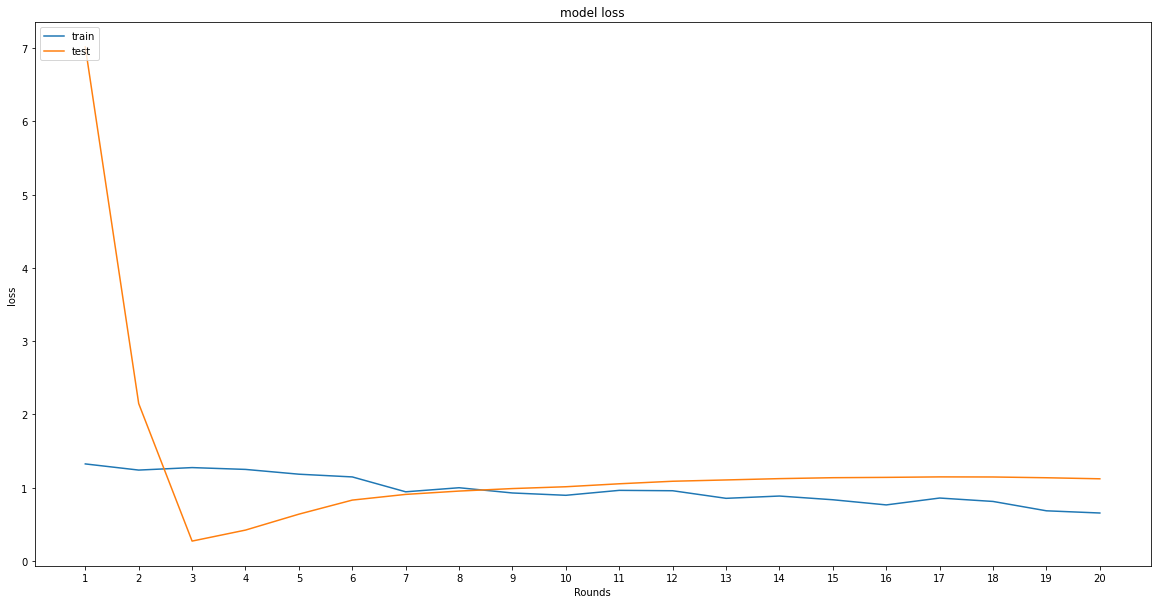

In [ ]:

t3 = plt.figure(figsize=(20,10))
x = range(1,21)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks,training_loss)
plt.plot(default_x_ticks,validation_loss)
plt.xticks(default_x_ticks, x)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Rounds')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('t3.png')
#files.download('t3.png')
plt.show()


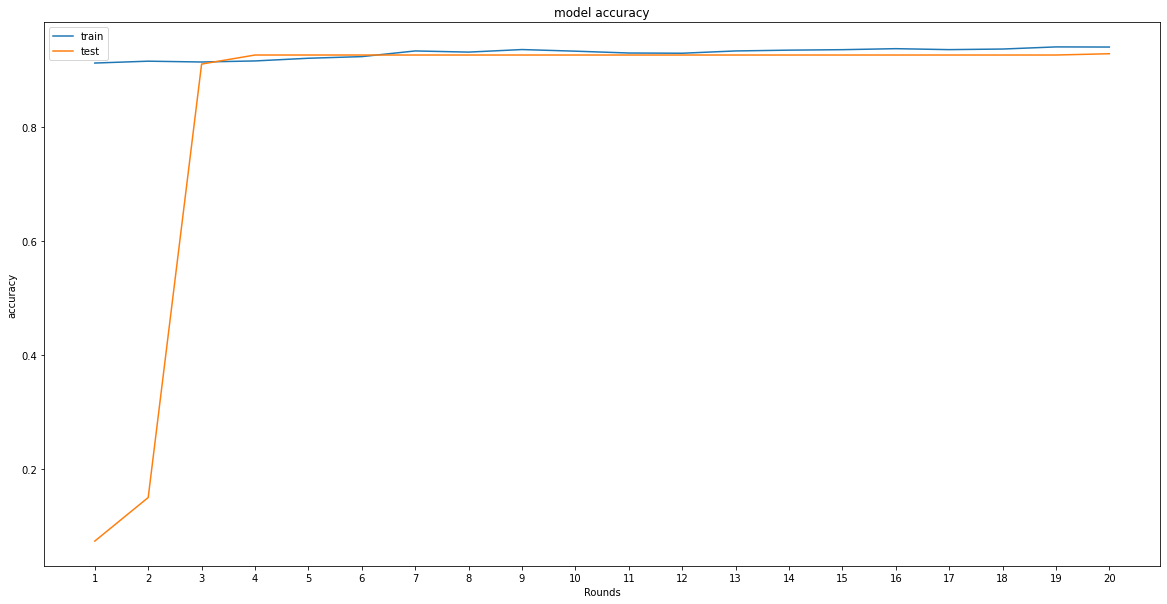

In [ ]:
t3 = plt.figure(figsize=(20,10))
x = range(1,21)
default_x_ticks = range(len(x))
plt.plot(default_x_ticks,training_accuracy)
plt.plot(default_x_ticks,validation_accuracy)
plt.xticks(default_x_ticks, x)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Rounds')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('t3.png')
plt.show()